In [ ]:
!pip install -r requirements.txt

In [1]:
import sys
import os

work_dir = os.path.abspath(os.path.join('..'))
if work_dir not in sys.path:
    sys.path.append(work_dir+"\\src")
    
print(work_dir)

D:\Lab\Jordan lab\outreach\QMBE_2023\materials\VTK_2023_behavior_classification


In [2]:
# setting working directory

work_dir = 'D:\Lab\Jordan lab\outreach\QMBE_2023\materials\VTK_2023_behavior_classification'

In [16]:
# import packages

import glob
import itertools
import umap
import hdbscan
import numpy as np
import pandas as pd

from lstm_train import train
from sklearn.preprocessing import StandardScaler
from visualization import hdbscan_figure, umap_figure, LSTM_hdbscan_figure, LSTM_umap_figure

In [4]:
# Setting keypoints

keypoint_names = ['mouth', 'head', 'dorsal_front', 'dorsal_center', 'dorsal_back', 'caudal_fin']

key_characters = [f'distance_{keypoint_names[1]}-{keypoint_names[1]}',
                  f'alignment_{keypoint_names[1]}-{keypoint_names[0]}',
                  f'alignment_{keypoint_names[4]}-{keypoint_names[3]}',
                  f'angles_{keypoint_names[1]}-{keypoint_names[0]} to {keypoint_names[1]}',
                  f'angles_{keypoint_names[4]}-{keypoint_names[3]} to {keypoint_names[1]}',
                  f'angles_{keypoint_names[1]}-{keypoint_names[0]} to {keypoint_names[4]}',
                  f'angles_{keypoint_names[4]}-{keypoint_names[3]} to {keypoint_names[4]}']

key_characters

['distance_head-head',
 'alignment_head-mouth',
 'alignment_dorsal_back-dorsal_center',
 'angles_head-mouth to head',
 'angles_dorsal_back-dorsal_center to head',
 'angles_head-mouth to dorsal_back',
 'angles_dorsal_back-dorsal_center to dorsal_back']

In [29]:
# import sampled frames with key characters
## key characters were already calculated from raw tracking data
sampled_df = pd.read_csv(work_dir + '/data/sampled_umap_cluster.csv')

## extract train_data with UMAP-HDBSCAN clustering ids (umap_neighbor == 15)

train_data = sampled_df[key_characters].to_numpy()
train_label = sampled_df['cluster_un15'].to_numpy()

## standardize the train data

scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)

In [30]:
# create umap model

umap_train = umap.UMAP(n_neighbors=15, random_state=0).fit(train_data)
train_data = umap_train.embedding_

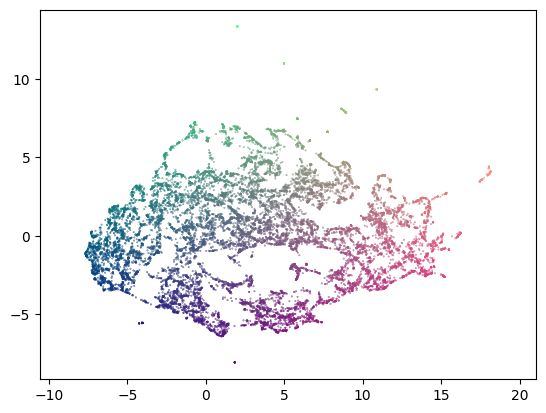

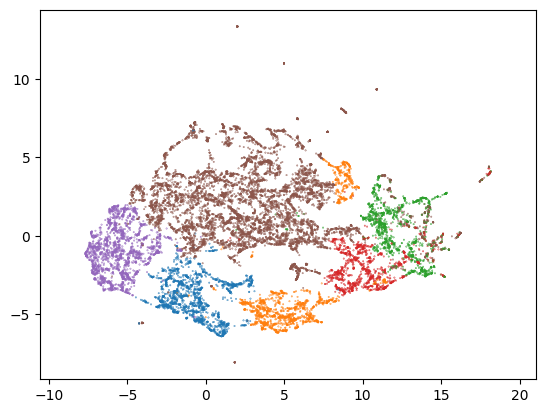

In [31]:
# visualize umap embedding of key characters of frames with HDBSCAN clustering resutls
## HDBSCAN clustering is only for visualization, not used for further steps

## UMAP embedding without clustering results
umap_figure(train_data)

## UMAP embedding with HDBSCAN clustering results
hdbscan_figure(train_data, train_label)

In [ ]:
## examples of pose clusters


In [32]:
# import time stamps for pre-classified behaviors
## example_motion_class.csv includes time stamps of lateral display and bite behavior

time_stamp_df = pd.read_csv(work_dir + '/data/example_motion_class.csv')

trial_path = os.path.join(work_dir+'/data/multi_*.csv')
trial_ls = glob.glob(os.path.normpath(trial_path))

In [33]:
time_stamp_df[:10]

,file,part,class,start_sec,end_sec,start,end
0,multi_contest_trial1_boxE_06Nov22,1,lateral,317,319,38039,38333
1,multi_contest_trial1_boxE_20Oct22,2,lateral,68,70,8199,8518
2,multi_contest_trial1_boxF_06Nov22,1,bite,81,82,9814,9919
3,multi_contest_trial2_boxE_23Oct22,2,lateral,42,44,5090,5273
4,multi_contest_trial2_boxE_23Oct22,2,lateral,359,360,43004,43138
5,multi_contest_trial2_boxF_06Nov22,1,bite,79,80,9559,9630
6,multi_contest_trial2_boxF_06Nov22,1,lateral,97,98,11647,11796
7,multi_contest_trial2_boxF_06Nov22,1,bite,132,132,15846,15924
8,multi_contest_trial2_boxF_06Nov22,1,bite,256,257,30729,30820
9,multi_contest_trial2_boxF_06Nov22,1,bite,257,257,30820,30913


In [34]:
trial_df_sample = pd.read_csv(trial_ls[0])[:10]

trial_df_sample

,time_stamp,distance_head-head,alignment_head-mouth,alignment_dorsal_back-dorsal_center,angles_head-mouth to head,angles_dorsal_back-dorsal_center to head,angles_head-mouth to dorsal_back,angles_dorsal_back-dorsal_center to dorsal_back
0,37881.0,121.344807,0.009661,-0.142219,2.679864,2.740804,2.582629,2.527602
1,37882.0,121.860694,0.013758,-0.106181,2.679986,2.703540,2.587864,2.500169
2,37883.0,122.376581,0.017855,-0.070144,2.680108,2.666277,2.593099,2.472736
3,37884.0,122.892468,0.021952,-0.034106,2.680229,2.629013,2.598335,2.445302
4,37885.0,123.408355,0.026049,0.001932,2.680351,2.591750,2.603570,2.417869
5,37886.0,123.924242,0.030147,0.037969,2.680473,2.554486,2.608806,2.390436
6,37887.0,124.440129,0.034244,0.074007,2.680595,2.517223,2.614041,2.363003
7,37888.0,124.956015,0.038341,0.110045,2.680717,2.479960,2.619277,2.335570
8,37889.0,125.471902,0.042438,0.146082,2.680839,2.442696,2.624512,2.308136
9,37890.0,125.987789,0.046535,0.182120,2.680961,2.405433,2.629747,2.280703


In [35]:
# create input data for training LSTM autoencoder

pd.options.mode.chained_assignment = None

max_seq_len = 0
raw_behav_seq = []
true_labels = []
for trial in trial_ls:
    ## import feature and time_stamp dataframes
    trial_df = pd.read_csv(trial)
    trial_name = trial.split('\\')[-1][:-12]
    print(trial_name)
    
    file_time_stamp = time_stamp_df[time_stamp_df['file']==trial_name]
    
    trial_df_labeled = pd.DataFrame()
    for index, row in file_time_stamp.iterrows():
        
        ## calculate start & end frames of each behavior
        ### raw videos were divided into three files due to the camera setting
        ### each file has 63660 frames
        part = int(row['part'])-1 
        bout_start = row['start'] + (part*63660) 
        bout_end = row['end'] + (part*63660) 
        
        ## save true labels
        bout_class = row['class']
        true_labels.append(bout_class)
        
        ## transform key characters of each behaviors into umap embedding
        bout_df = trial_df[(trial_df['time_stamp'] >= bout_start) & (trial_df['time_stamp'] <= bout_end)]
        bout_feature = bout_df[key_characters].to_numpy()
        bout_feature = scaler.transform(bout_feature)
        bout_umap = umap_train.transform(bout_feature)
        
        ## upadate max_seq_len for zero-padding
        if bout_umap.shape[0] > max_seq_len:
            max_seq_len = bout_umap.shape[0]
        
        raw_behav_seq.append(bout_umap)

multi_contest_trial1_boxE_06Nov22
multi_contest_trial1_boxE_20Oct22
multi_contest_trial1_boxF_06Nov22
multi_contest_trial2_boxE_23Oct22
multi_contest_trial2_boxF_06Nov22
multi_contest_trial3_boxE_06Nov22
multi_contest_trial3_boxE_20Oct22
multi_contest_trial3_boxF_06Nov22
multi_contest_trial5_boxE_20Oct22
multi_contest_trial5_boxF_06Nov22


In [36]:
## zero-padding to max_seq_len

input_seq = []
for indiv_seq in raw_behav_seq:
    indiv_seq = np.array(indiv_seq)
    pad_width_0 = (max_seq_len-indiv_seq.shape[0])//2
    pad_width_1 = (max_seq_len-indiv_seq.shape[0]) - pad_width_0
    indiv_seq_pad = np.pad(indiv_seq, ((pad_width_0, pad_width_1),(0, 0)))
    input_seq.append(indiv_seq_pad)
    
input_seq = np.array(input_seq)

input_seq.shape

(28, 440, 2)

In [37]:
# train LSTM autoencoder
## setting parameters

LEARNING_RATE = 0.0005
BATCH_SIZE = 16
EPOCHS = 150

In [19]:
## train LSTM autoencoder
Autoencoder, Encoder, Decoder = train(input_seq, LEARNING_RATE, BATCH_SIZE, EPOCHS)

## get latent_representation of input sequences
latent_representation = Encoder.predict(input_seq)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 440, 2)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               41200     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 440, 100)         0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 440, 100)          80400     
                                                                 
 time_distributed_1 (TimeDis  (None, 440, 2)           202       
 tributed)                                                       
                                                                 
Total params: 121,802
Trainable params: 121,802
Non-tr

2/2 [==============================] - 1s 284ms/step - loss: 4.6756
Epoch 88/150
2/2 [==============================] - 1s 300ms/step - loss: 4.6887
Epoch 89/150
2/2 [==============================] - 1s 286ms/step - loss: 4.6228
Epoch 90/150
2/2 [==============================] - 1s 285ms/step - loss: 4.6202
Epoch 91/150
2/2 [==============================] - 1s 298ms/step - loss: 4.6350
Epoch 92/150
2/2 [==============================] - 1s 280ms/step - loss: 4.6403
Epoch 93/150
2/2 [==============================] - 1s 283ms/step - loss: 4.6177
Epoch 94/150
2/2 [==============================] - 1s 285ms/step - loss: 4.7491
Epoch 95/150
2/2 [==============================] - 1s 288ms/step - loss: 4.6570
Epoch 96/150
2/2 [==============================] - 1s 291ms/step - loss: 4.7117
Epoch 97/150
2/2 [==============================] - 1s 287ms/step - loss: 4.6809
Epoch 98/150
2/2 [==============================] - 1s 292ms/step - loss: 4.6359
Epoch 99/150
2/2 [=======================

Results with umap_neighbor = 5


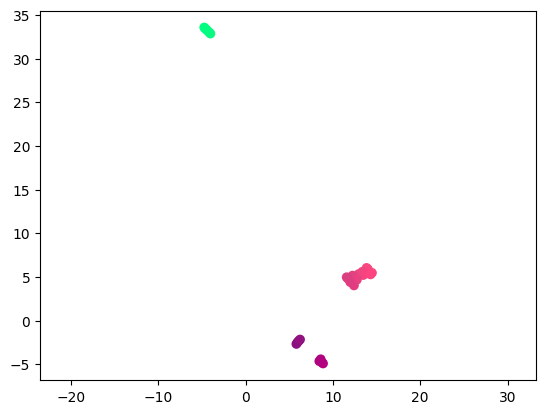

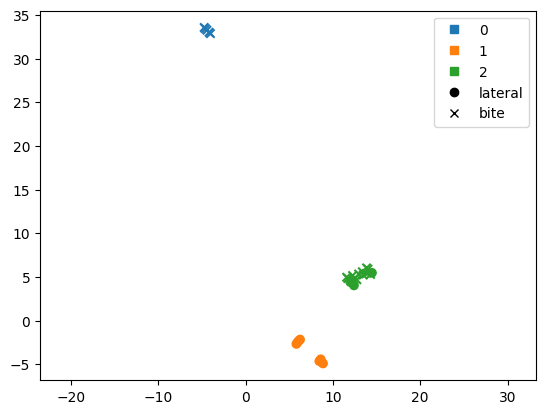

Results with umap_neighbor = 10


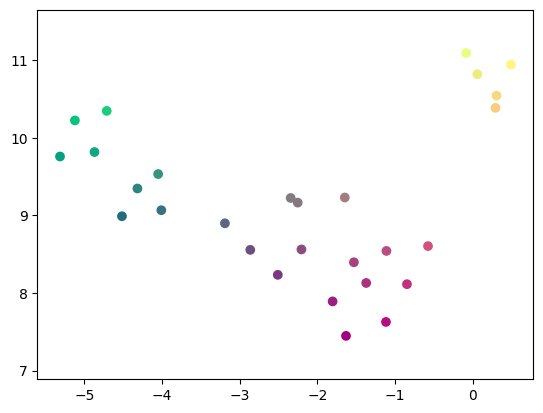

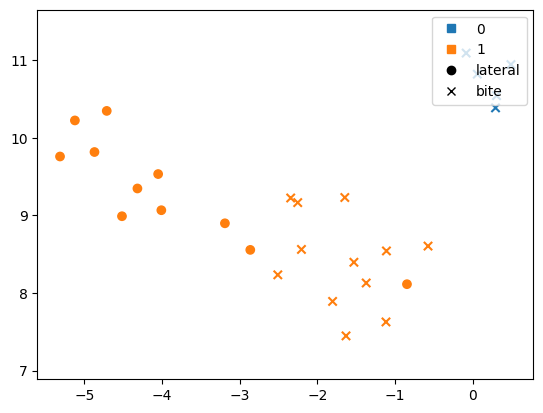

Results with umap_neighbor = 15


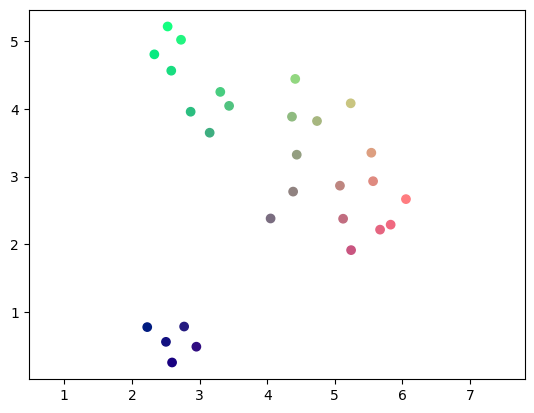

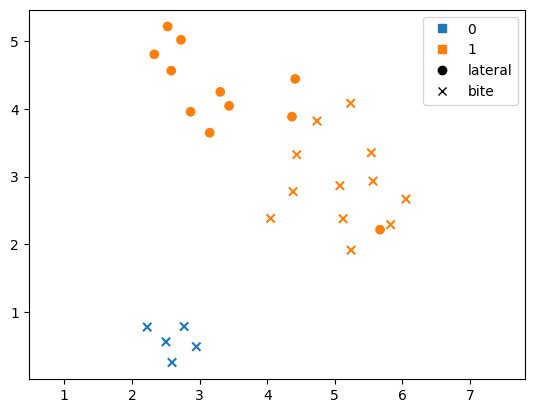

Results with umap_neighbor = 20


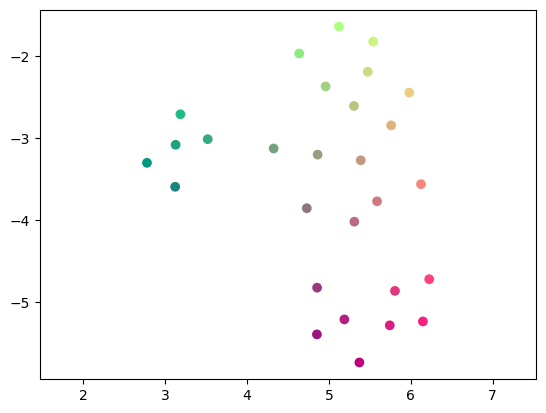

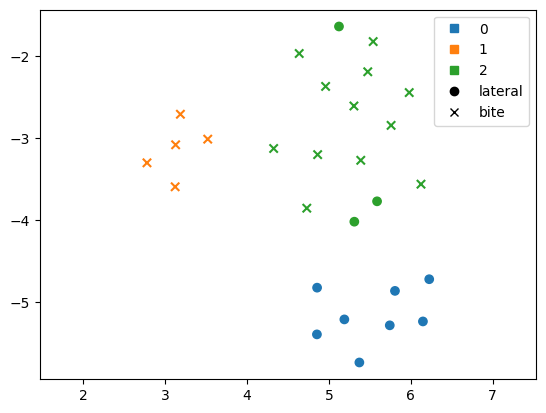

In [40]:
# HDBSCAN clustering of latent representations

cluster_labels_df = pd.DataFrame()
umap_neighbor = [5, 10, 15, 20]
for neighbor in umap_neighbor:
    print(f"Results with umap_neighbor = {neighbor}")
    ## UMAP with latent representation
    reducer = umap.UMAP(random_state=0, n_neighbors=neighbor).fit(latent_representation)
    second_embedding = reducer.transform(latent_representation)
    ### visualize umap embedding of LSTM latent representation
    LSTM_umap_figure(second_embedding)
    
    ## HDBSCAN clustering
    clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
    clusterer.fit(second_embedding)
    cluster_labels = clusterer.labels_
    ## append cluster_labels
    cluster_labels_df[f"cluster_un{neighbor}"] = cluster_labels
    
    ### visualize HDBSCAN clustering
    LSTM_hdbscan_figure(second_embedding, cluster_labels, true_labels)

In [41]:
fin_df = pd.concat([time_stamp_df, cluster_labels_df], axis=1)

fin_df

,file,part,class,start_sec,end_sec,start,end,cluster_un5,cluster_un10,cluster_un15,cluster_un20
0,multi_contest_trial1_boxE_06Nov22,1,lateral,317,319,38039,38333,1,1,1,0
1,multi_contest_trial1_boxE_20Oct22,2,lateral,68,70,8199,8518,2,1,1,2
2,multi_contest_trial1_boxF_06Nov22,1,bite,81,82,9814,9919,2,1,1,2
3,multi_contest_trial2_boxE_23Oct22,2,lateral,42,44,5090,5273,1,1,1,0
4,multi_contest_trial2_boxE_23Oct22,2,lateral,359,360,43004,43138,1,1,1,0
5,multi_contest_trial2_boxF_06Nov22,1,bite,79,80,9559,9630,2,1,1,2
6,multi_contest_trial2_boxF_06Nov22,1,lateral,97,98,11647,11796,2,1,1,2
7,multi_contest_trial2_boxF_06Nov22,1,bite,132,132,15846,15924,2,1,1,2
8,multi_contest_trial2_boxF_06Nov22,1,bite,256,257,30729,30820,2,1,1,2
9,multi_contest_trial2_boxF_06Nov22,1,bite,257,257,30820,30913,2,1,1,2


In [45]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [46]:
true_label = fin_df["class"].to_numpy()
for neighbor in umap_neighbor:
    pred_label = fin_df[f"cluster_un{neighbor}"]
    rand_score = adjusted_rand_score(true_label, pred_label)
    mutual_info = adjusted_mutual_info_score(true_label, pred_label)
    print(f"adjusted_rand_score for umap_neighbor {neighbor}: {rand_score}")
    print(f"adjusted_mutual_info for umap_neighbor {neighbor}: {mutual_info}")

adjusted_rand_score for umap_neighbor 5: 0.3667104124200709
adjusted_mutual_info for umap_neighbor 5: 0.4549423199030131
adjusted_rand_score for umap_neighbor 10: -0.020099513676102663
adjusted_mutual_info for umap_neighbor 10: 0.14674248298829623
adjusted_rand_score for umap_neighbor 15: -0.020099513676102663
adjusted_mutual_info for umap_neighbor 15: 0.14674248298829623
adjusted_rand_score for umap_neighbor 20: 0.3667104124200709
adjusted_mutual_info for umap_neighbor 20: 0.45494231990301315


In [ ]:
# The results can be improved by 
# adding more key characters, changing hyperparamters for UMAP, HDBSCAN, or LSTM autoencoder, etc.